In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import Exactrel
import networkx as nx
import copy
import pickle
# "the default sans-serif font is Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 10})

In [2]:
# Define the indivudual reliability function
def r(t):
    return np.exp((2-2*np.exp(-0.5*t)-t)/8)

In [3]:
# Plot individual r for different t
T = np.linspace(0, 60, 101)
R = np.zeros(len(T))
for j in range(len(T)):
    R[j] = r(T[j])

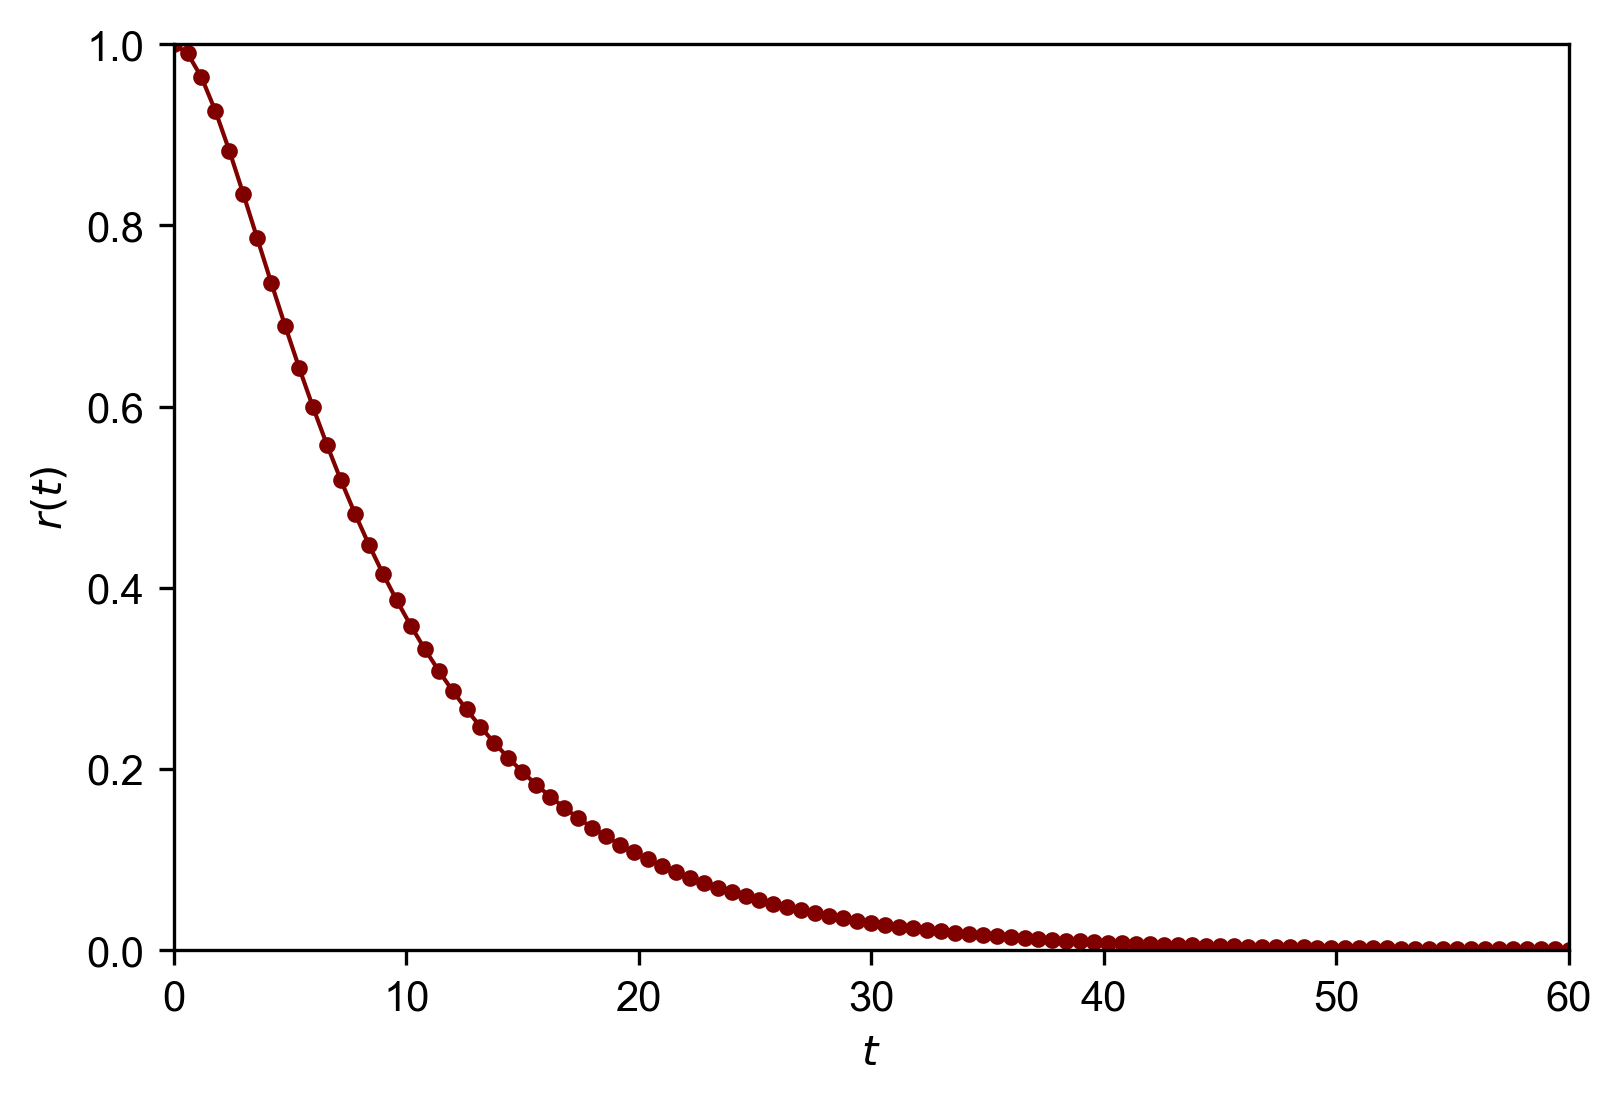

In [31]:
plt.plot(T, R, color='maroon', linewidth = 1, marker = 'o', markersize = 3)
plt.ylim(0, 1)
plt.xlim(0, 60)
plt.xlabel('$t$')
plt.ylabel('$r(t)$')
plt.rcParams['figure.figsize'] = (6, 4) 
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
plt.savefig(r"%s.jpg"%('IDR'), bbox_inches='tight')
plt.show()

In [3]:
# The cities, nodes represent cities in this order
Cities = ['Houston', 'Dallas', 'Oklahoma City', 'Kansas City', 'Memphis', 'Birmingham', 'New Orleans']
# Define the network through an adjacent matrix
AM = np.array([[0, 1, 0, 0, 0, 0, 1 ], [1, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 1, 0, 0], [0, 0, 1, 0, 1, 0, 0],
               [0, 1, 1, 1, 0, 1, 1], [0, 0, 0, 0, 1, 0, 1], [1, 1, 0, 0, 1, 1, 0]])
# Buidl networkx netowrk object from adjacent matrix 
Graph = nx.from_numpy_matrix(AM)
Nodes = list(Graph.nodes())
Edges = list(Graph.edges())
Source = Nodes[4]
Terminal = Nodes[0]

In [4]:
# Preprocess to obtain basic mapping data
# Build edge-index (interger) and index-edge mapping to facilitate event formulation
# Output: dictionary with edge as key and index as value
def edgeindexmap(digraph, source):
    # Visit the edges from the source through BFS, get layers of edges 
    bfsedges = list(nx.edge_bfs(digraph, source))
    edgeindex = {}
    indexedge = {}
    for i in range(len(bfsedges)):
        edgeindex[bfsedges[i]] = i+1
        indexedge[(i+1)] = bfsedges[i]
    return edgeindex, indexedge

In [5]:
# Build index-reliability mapping
# Output: dictionary with index as key and reliability as value
def indexprobmap(edgeindex, edgeprob):
    indexprob = {}
    for edge, index in edgeindex.items():
        try:
            indexprob[index] = edgeprob[edge]
        except:
            (u, v) = edge
            indexprob[index] = edgeprob[(v, u)]
    return indexprob

In [7]:
# Calculate the exact network reliability for each time instant 
NETR = np.zeros(len(T))
FS = [[]]*len(T)
for k in range(len(T)):
    # Assign survival probability to each edge
    Rk = r(T[k])
    Survivprob = [Rk] * len(Edges)
    # Define a dictionary to represent the link reliability mapping
    Zipobj = zip(Edges, Survivprob)
    Edgessurvivprob = dict(Zipobj)
    Edgeindex, Indexedge = edgeindexmap(Graph, Source)
    Indexprob = indexprobmap(Edgeindex, Edgessurvivprob)
    R1, R2, F = Exactrel.ssp(Graph, Source, Terminal, Edgeindex, Indexedge, Indexprob)
    NETR[k] = R1

In [16]:
# Calculate the integration over 0, 60
TINTE = np.linspace(0, 60, 6001)

In [15]:
def apprintegral(tinte, graph, source, terminal, edges):
    integral = 0
    rpre = 0
    dt = tinte[1] - tinte[0]
    for k in range(len(tinte)):
        rk = r(TINTE[k])
        survivprob = [rk] * len(edges)
        # Define a dictionary to represent the link reliability mapping
        zipobj = zip(edges, survivprob)
        edgessurvivprob = dict(zipobj)
        edgeindex, indexedge = edgeindexmap(graph, source)
        indexprob = indexprobmap(edgeindex, edgessurvivprob)
        r1, r2, f = Exactrel.ssp(graph, source, terminal, edgeindex, indexedge, indexprob)
        integral += (r1 + rpre) * dt / 2
        rpre = r1
    return integral 

In [17]:
Integral = apprintegral(TINTE, Graph, Source, Terminal, Edges)

In [19]:
def count(feasibleset):
    countexp = np.zeros((len(feasibleset), 2))
    for i in range(len(feasibleset)):
        path = feasibleset[i]
        for k in range(len(path)):
            if int(path[k]) > 0:
                countexp[i][0] += 1
            else:
                countexp[i][1] += 1
    return countexp 

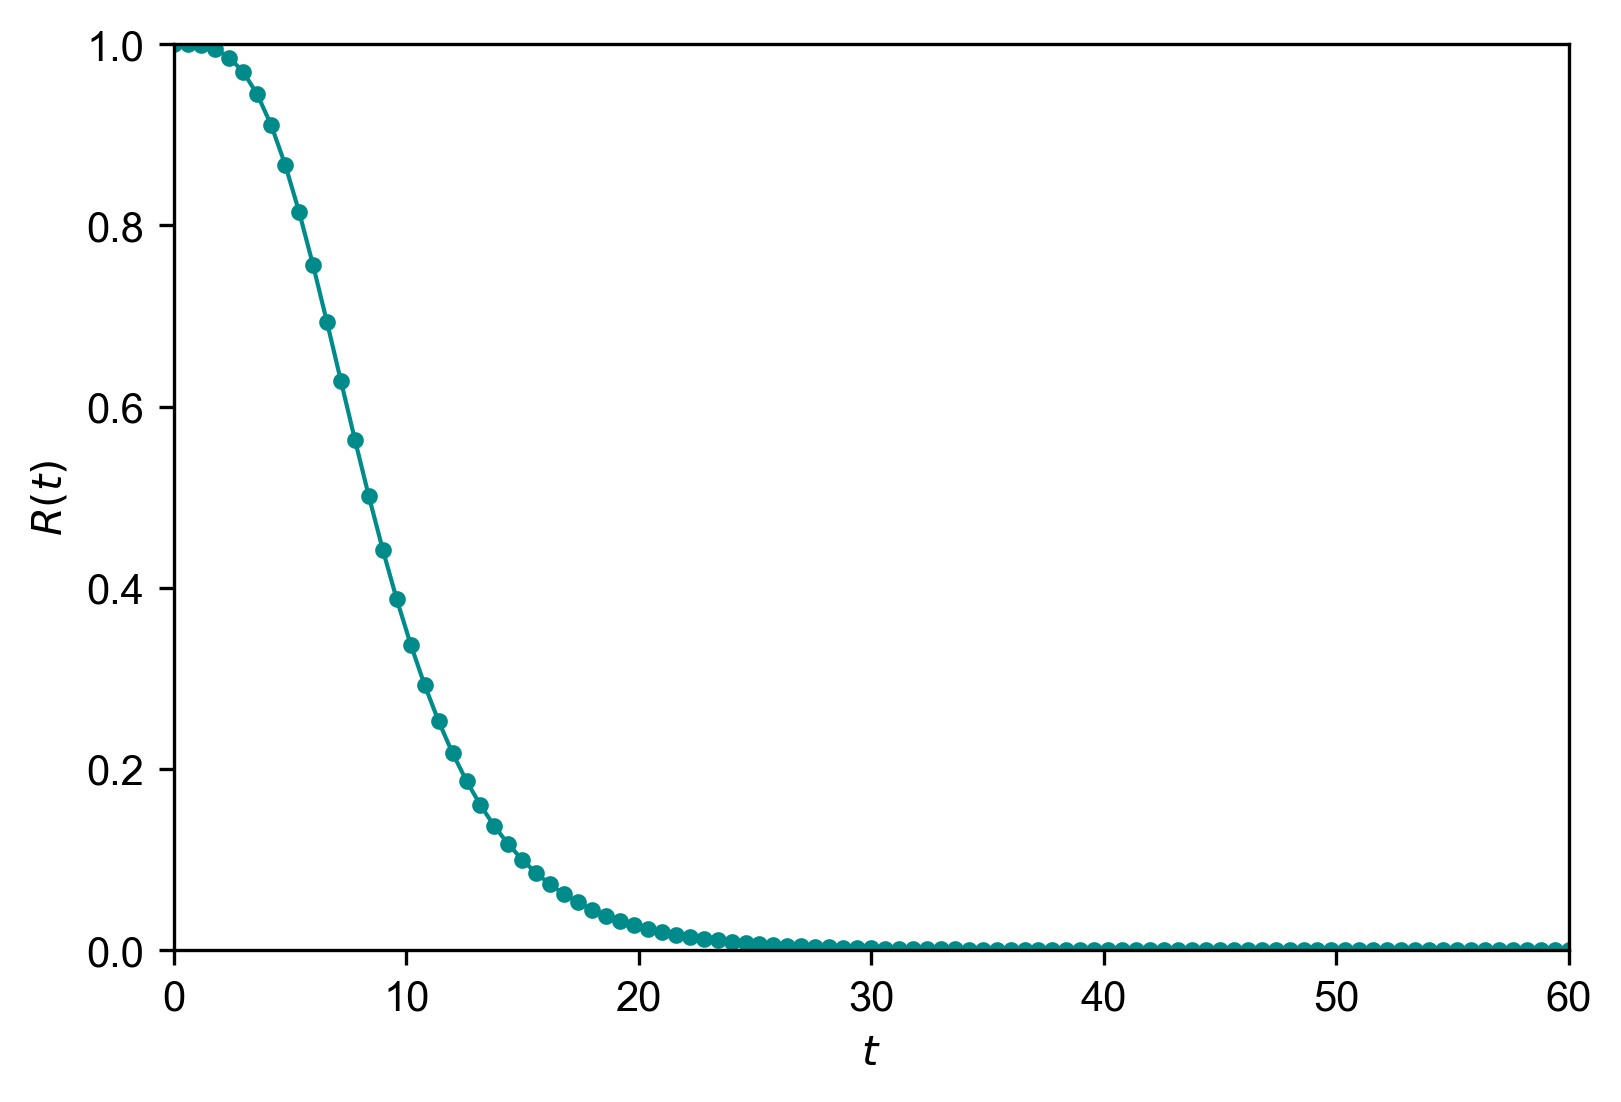

In [33]:
plt.plot(T, NETR, color='darkcyan', linewidth = 1, marker = 'o', markersize = 3)
plt.ylim(0, 1)
plt.xlim(0, 60)
plt.xlabel('$t$')
plt.ylabel('$R(t)$')
plt.rcParams['figure.figsize'] = (6, 4) 
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
plt.savefig(r"%s.jpg"%('R'), bbox_inches='tight')
plt.show()

In [35]:
# Perform PAC guranteed Monte Carlo


In [36]:
D, P = stats.kstest(cdf = NETF, N=len(NETF))

TypeError: kstest() missing 1 required positional argument: 'rvs'